In [1]:
import os
from collections import defaultdict
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = "../data"
os.listdir(data_dir)

['bus_stops_wszone.dbf',
 'bus_stops_wszone.shp',
 'singstat',
 'net_202001_15.net',
 'OD_bus',
 'net_202001_05.net',
 'net_202001_06.net',
 'origin_destination_train_201912.csv.xz',
 'train_station_wszone.prj',
 'origin_destination_train_202001.csv.xz',
 'train_station_wszone.dbf',
 'OD_202001_weekend.csv.xz',
 'net_202001_22.net',
 'subzone_centroid.csv',
 'OD_201912_weekday.csv.xz',
 'origin_destination_bus_201911.csv.xz',
 'net_202001_19.net',
 'net_202001_18.net',
 'train_station_wszone.cpg',
 'OD_PT',
 'train_station_wszone.shx',
 'net_202001_10.net',
 'OD_201911_weekend.csv.xz',
 'origin_destination_train_201911.csv.xz',
 'planning-area-2014',
 'net_202001_weekend.net',
 'subzone_centroid_pos.json',
 '.ipynb_checkpoints',
 'net_202001_21.net',
 'origin_destination_bus_202001.csv.xz',
 'OD_201912_weekend.csv.xz',
 'net_202001_07.net',
 'origin_destination_bus_201912.csv.xz',
 'net_202001_23.net',
 'region-2014',
 'train_station_wszone.shp',
 'net_202001_weekday.net',
 'net_202001

In [3]:
gdf = gpd.read_file(os.path.join(data_dir, 'bus_stops_wszone.shp'))
gdf.head()

,PTcode,desc,lat,lon,index_szon,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,...,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,65539,Blk 224A,1.402291,103.893700,265.0,266.0,3.0,MATILDA,PGSZ03,N,...,PG,NORTH-EAST REGION,NER,14D0DB33976B7B81,2014-12-05,35089.9853,42728.2745,5361.915964,1.418284e+06,POINT (34719.631 42683.817)
1,98309,Carissa Pk,1.359960,103.964737,231.0,232.0,8.0,FLORA DRIVE,PRSZ08,N,...,PR,EAST REGION,ER,FA9C76B49B6D0C95,2014-12-05,42801.7349,37930.5489,3956.615777,9.449984e+05,POINT (42625.345 38003.381)
2,65541,Before Sumang Lane,1.403562,103.891200,265.0,266.0,3.0,MATILDA,PGSZ03,N,...,PG,NORTH-EAST REGION,NER,14D0DB33976B7B81,2014-12-05,35089.9853,42728.2745,5361.915964,1.418284e+06,POINT (34441.411 42824.350)
3,49159,Econ Group,1.437072,103.745813,288.0,289.0,5.0,RESERVOIR VIEW,SKSZ05,N,...,SK,NORTH REGION,NR,40050ADDFBCC870F,2014-12-05,18367.1710,45940.4868,10399.424485,3.284130e+06,POINT (18261.920 46529.810)
4,98311,Bef Mariam Wk,1.359306,103.968491,231.0,232.0,8.0,FLORA DRIVE,PRSZ08,N,...,PR,EAST REGION,ER,FA9C76B49B6D0C95,2014-12-05,42801.7349,37930.5489,3956.615777,9.449984e+05,POINT (43043.145 37931.100)


In [4]:
len(gdf), gdf.crs

(5029,
 {'proj': 'tmerc',
  'lat_0': 1.366666666666667,
  'lon_0': 103.8333333333333,
  'k': 1,
  'x_0': 28001.642,
  'y_0': 38744.572,
  'datum': 'WGS84',
  'units': 'm',
  'no_defs': True})

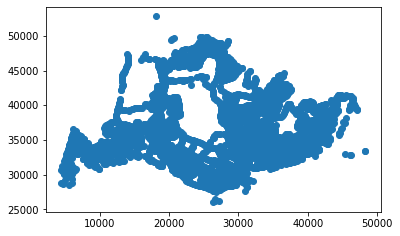

In [5]:
gdf.plot()

In [6]:
bus_stop_loc = {}
for i,s in zip(gdf["PTcode"].tolist(), gdf["SUBZONE_N"].tolist()):
    bus_stop_loc[i] = s

In [9]:

fs = [ f for f in os.listdir(data_dir) if ".csv.xz" in f ]
fs = [ f for f in fs if "origin_destination_bus" in f ] 
fs

['origin_destination_bus_201911.csv.xz',
 'origin_destination_bus_202001.csv.xz',
 'origin_destination_bus_201912.csv.xz']

In [12]:
for f in fs:
    #df = pd.read_csv(os.path.join(data_dir, f))
    month_str = f.replace("origin_destination_bus_", "").replace(".csv.xz", "")
    print(month_str)

201911
202001
201912


In [4]:
df = pd.read_csv(os.path.join(data_dir, "origin_destination_bus_201912.csv"))
df.head(10)

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
0,2019-12,WEEKENDS/HOLIDAY,12,BUS,93201,92111,38
1,2019-12,WEEKDAY,13,BUS,1239,3059,238
2,2019-12,WEEKDAY,13,BUS,55139,53241,95
3,2019-12,WEEKENDS/HOLIDAY,13,BUS,55139,53241,76
4,2019-12,WEEKENDS/HOLIDAY,13,BUS,40181,53379,38
5,2019-12,WEEKDAY,13,BUS,40181,53379,171
6,2019-12,WEEKDAY,16,BUS,21559,21231,19
7,2019-12,WEEKDAY,21,BUS,65069,64461,399
8,2019-12,WEEKENDS/HOLIDAY,21,BUS,65069,64461,57
9,2019-12,WEEKDAY,10,BUS,51051,66331,19


In [5]:
df_wday = df[df["DAY_TYPE"]=="WEEKDAY"]
len(df_wday)

3782803

In [11]:
df_wday["TOTAL_TRIPS"].sum()/1000000/22

66.37305445454545

In [25]:
def process_an_hour(df_temp, hr):
    flows = defaultdict(int)
    for i in range(len(df_temp)):
        this_row = df_temp.iloc[i]
        o = this_row["ORIGIN_PT_CODE"]
        d = this_row["DESTINATION_PT_CODE"]
        t = this_row["TOTAL_TRIPS"]
        o2 = bus_stop_loc[str(o)]
        d2 = bus_stop_loc[str(d)]
        flows[(o2, d2)]+=t
    
    flows2 = []
    for k,v in flows.items():
        i,j = k
        d = {"origin":i, "destination":j, "hour":hr, "flow": v}
        flows2.append(d)
    df2 = pd.DataFrame.from_dict(flows2)
    df2 = df2[["origin", "destination", "hour", "flow"]]
    return df2

In [28]:
for hr in range(24):
    temp = df_wday[df_wday["TIME_PER_HOUR"]==hr]
    temp2 = process_an_hour(temp, hr)
    print(hr, len(temp), len(temp2))
    fout = os.path.join(data_dir, "OD_bus", "OD_201912_weekday_{}.csv".format(str(hr).zfill(2)))
    temp2.to_csv(fout, index_label="ind")
    #break

0 57317 9368
1 8687 2152
2 2654 1058
3 625 313
4 127 79
5 50716 8974
6 144969 17126
7 197519 19266
8 212379 19620
9 207508 19573
10 207729 19704
11 212652 20016
12 220482 20249
13 219646 20424
14 216249 20287
15 219261 20463
16 225589 20523
17 237932 20813
18 238773 20783
19 216630 19935
20 194156 19360
21 185125 19120
22 170578 18671
23 135500 17053


In [8]:
df_wend = df[df["DAY_TYPE"]=="WEEKENDS/HOLIDAY"]
len(df_wend)

2897882

In [10]:
df_wend["TOTAL_TRIPS"].sum()/1000000/9

64.84636877777777

In [30]:
for hr in range(24):
    temp = df_wend[df_wend["TIME_PER_HOUR"]==hr]
    temp2 = process_an_hour(temp, hr)
    fout = os.path.join(data_dir, "OD_bus", "OD_201912_weekend_{}.csv".format(str(hr).zfill(2)))
    temp2.to_csv(fout, index_label="ind")
    print(hr, len(temp), len(temp2))
    #break

0 40464 8020
1 3899 1336
2 610 397
3 89 51
4 83 49
5 32584 7128
6 104281 15059
7 138296 16986
8 155641 17657
9 160775 17826
10 166147 18308
11 171277 18545
12 178068 18991
13 177714 19016
14 173447 18966
15 173709 18976
16 176330 19056
17 181240 19121
18 176424 18954
19 165104 18399
20 148918 17735
21 140781 17455
22 129307 16955
23 102694 15347
